# Aplicações com Python

### Sumário
  - Formatando documentos com `Regex`
  - Raspagem de dados web com `Selenium`
  - Built-in function `open`
  - Criando e salvando planilhas com `Pandas`
  - Manipulando dados de planilhas com `Pandas`
  - Lendo arquivos PDF com PyPDF2
  - Acessando API's com `requests`
  - Criando paleta de cores com a API do Colormind

## Formatando documentos com Regex

Devido ao grande número de golpes digitais, onde o bandido, de posse dos dados pessoais da pessoa cria contas ou se passar pela mesma em várias situações para cometer crimes, foi solicitado que todos os CPF's de todos documentos públicos tenham do 4º ao 9º dígitos (inclusive estes) repassados por *. Sua missão é fazer isso em todos documentos digitais públicos da empresa.

In [1]:
# Biblioteca para identificar, encontrar e substituir padrões de texto
import re

In [2]:
# objeto do tipo string representando o texto a ser formatado
documento = """
  Lorem ipsum dolor sit amet, consectetur adipiscing elit.
  Donec laoreet magna at tortor imperdiet 385.749.880-30 porttitor.
  Curabitur eu metus vehicula lacus vestibulum tempor.
  Sed odio turpis, convallis et neque facilisis, malesuada luctus ex.
  Class aptent taciti sociosqu 994.59160.73-6 ad litora torquent
  per conubia nostra, per 475.85417.87-0 inceptos himenaeos.
  Pellentesque lacinia purus id leo consectetur, nec dignissim metus imperdiet.
  Maecenas ac leo imperdiet, porttitor 531.130.990-30 neque sed, dictum augue.
  Ut ac augue orci.
"""

# Definindo o padrão para encontrar CPF
# \d dígito
# {3} 3 vezes
# {2} 2 vezes
# \. ponto
# \- hífen
# Para aprender e testar padrões https://regexr.com/
padrao = re.compile("\d{3}\.\d{3}\.\d{3}\-\d{2}")

# Encontrando todos os CPF's no documento
cpfs = re.findall(padrao, documento)

# imprimindo o resultado
print(cpfs)

['385.749.880-30', '531.130.990-30']


No código acima encontramos os padrões (CPF's) e mostramos.

In [3]:
# use parênteses para agrupar padrões
padrao = re.compile("(\d{3}\.)(\d{3}\.\d{3})(\-\d{2})")

# Encontrando todos os CPF's no documento
cpfs = re.findall(padrao, documento)

# imprimindo o resultado
print(cpfs)

[('385.', '749.880', '-30'), ('531.', '130.990', '-30')]


No código acima, novamente, encontramos os padrões (CPF's) e mostramos, só que dessa vez separamos em três grupos, a saber, o primeiro grupo dos 3 primeiros dígitos mais o ponto, o segundo grupo dos 6 próximos dígitos mais o segundo ponto e o terceiro grupo com o hífen e os dois últimos dígitos.

Nosso próximo passo é manter o primeiro e último grupo e alterar o grupo 2.

<img width="350px" src="../assets/regex.png">

In [5]:
# use parênteses para agrupar padrões
padrao = re.compile("(\d{3}\.)(\d{3}\.\d{3})(\-\d{2})")

# Substituindo todos os CPF's no documento
novo_documento = re.sub(padrao, "\g<1>***.***\g<3>", documento)

# Mostrando o novo documento
print(novo_documento)


  Lorem ipsum dolor sit amet, consectetur adipiscing elit.
  Donec laoreet magna at tortor imperdiet 385.***.***-30 porttitor.
  Curabitur eu metus vehicula lacus vestibulum tempor.
  Sed odio turpis, convallis et neque facilisis, malesuada luctus ex.
  Class aptent taciti sociosqu 994.59160.73-6 ad litora torquent
  per conubia nostra, per 475.85417.87-0 inceptos himenaeos.
  Pellentesque lacinia purus id leo consectetur, nec dignissim metus imperdiet.
  Maecenas ac leo imperdiet, porttitor 531.***.***-30 neque sed, dictum augue.
  Ut ac augue orci.



# Raspagem de dados na Web

### Configuração do Selenium para Google Colab

O código abaixo configura o Colab para instalação das ferramentas necessárias. Não se preocupe com a complexidade, copie todo o código, cole no seu notebook e execute.

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

O código abaixo atualiza os repositórios do Linux no Colab, instala o driver (o robô) e, por fim, instala a biblioteca Python Selenium para controlar o driver.

In [ ]:
!apt-get update
!apt-get install chromium chromium-driver
!pip3 install selenium

Você está fazendo um orçamento de um eletrodoméstico para uma escola pública. Faça um código em Python que faça uma pesquisa de preços.

In [ ]:
# importando as bibliotecas
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time

In [ ]:
# Substitua o texto pelo link do seu site
url = "DIGITE O SITE AQUI"

# Essas são configurações do driver
service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)

# Agora vamos entrar na página 
driver.get(url)

# esperar a página carregar por 1 segundo
time.sleep(1)

# imprimir o conteúdo da tag title da página
print(driver.title)

# fechar o driver
driver.quit()

In [ ]:
# Substitua o texto pelo link do seu site
url = "DIGITE O SITE AQUI"

# Essas são configurações do driver
service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)

# Agora vamos entrar na página 
driver.get(url)

# esperar a página carregar por 6 segundos
time.sleep(6)

# Escolha um elemento na página, clique com o direito e depois em inspecionar (Google Chrome)
# Substitua tag pela tag do elemento que você quer informações
# Substitua atributo pelo atributo do elemento que você quer informações
# Substitua valor pelo valor do atributo do elemento que você quer informações
# O driver vai capturar as informações do elemento que você quer informações
el = driver.find_element("xpath", '//tag[@atributo="valor"]') 

# Imprime o conteúdo da tag
print(el.text)

# fechar o driver
driver.quit()

Vimos como pegar informações de um elemento, agora veremos como pegar informação de vários elementos.

In [ ]:
# Substitua o texto pelo link do seu site
url = "DIGITE O SITE AQUI"

# Essas são configurações do driver
service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)

# Agora vamos entrar na página 
driver.get(url)

# esperar a página carregar por 6 segundos
time.sleep(6)

# Escolha um elemento na página, clique com o direito e depois em inspecionar (Google Chrome)
# Substitua tag pela tag do elemento que você quer informações
# Substitua atributo pelo atributo do elemento que você quer informações
# Substitua valor pelo valor do atributo do elemento que você quer informações
# O driver vai capturar as informações do elemento que você quer informações
el = driver.find_elements("xpath", '//tag[@atributo="valor"]')

# criando a lista com o nome dos produtos
prods = []
for el in els:
    print(el.text) # imprimindo o nome
    prods.append(el.text) # adicionando a lista

# fechar o driver
driver.quit()

O código acima criou uma lista com os nomes dos produtos, agora criaremos uma lista com os preços dos produtos.

In [ ]:
# Substitua o texto pelo link do seu site
url = "DIGITE O SITE AQUI"

# Essas são configurações do driver
service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)

# Agora vamos entrar na página 
driver.get(url)

# esperar a página carregar por 6 segundos
time.sleep(6)

# Escolha um elemento na página, clique com o direito e depois em inspecionar (Google Chrome)
# Substitua tag pela tag do elemento que você quer informações
# Substitua atributo pelo atributo do elemento que você quer informações
# Substitua valor pelo valor do atributo do elemento que você quer informações
# O driver vai capturar as informações do elemento que você quer informações
el = driver.find_elements("xpath", '//tag[@atributo="valor"]')

# criando a lista com o nome dos produtos
prices = []
for el in els:
    print(el.text) # imprimindo o nome
    prices.append(el.text) # adicionando a lista

# fechar o driver
driver.quit()

As listas devem ter o mesmo tamanho para continuarmos!

In [ ]:
print(len(prices))
print(len(prods))

Caso seu código não tenha capturado as listas de tamanho correto ou em formatos corretos, pode usar as variáveis abaixo para prosseguir com o tutorial.

In [6]:
prices = ["R$ 1.000,00", "R$ 578,00", "R$ 115,12", "R$ 2.567,99", "R$ 325,00"]
prods = ["Sugar", "Microondas", "Ventilador", "Cama box king", "Batedeira"]

Salvaremos nosso orçamento num arquivo de nome orcamento.txt

In [7]:
f = open("orcamento.txt", "w")
for prod, price in zip(prods, prices):
    f.write(prod + " " + price + "\n")
f.close()

## Criando  e salvando planilhas com Pandas

A escola prefere o arquivo em excel. Faça uma planilha com o orçamento levantado.

In [12]:
import pandas as pd

planilha = pd.DataFrame({
    "Item": prods,
    "Preço": prices
})

planilha.to_excel("output.xlsx")

Podemos visualizar as 3 primeiras linhas da planilha acima:

In [13]:
planilha.head(3)

,Item,Preço
0,Sugar,"R$ 1.000,00"
1,Microondas,"R$ 578,00"
2,Ventilador,"R$ 115,12"


## Manipulando dados de planilhas

A escola não esperava uma planilha tão grande e precisa agora saber qual produto é mais barato. Precisa novamente da sua ajuda.

In [14]:
# lendo os dados da planilha salva
planilha = pd.read_excel('output.xlsx', index_col=0)

# podemos conferir olhando as 4 primeiras linhas
planilha.head(4)

,Item,Preço
0,Sugar,"R$ 1.000,00"
1,Microondas,"R$ 578,00"
2,Ventilador,"R$ 115,12"
3,Cama box king,"R$ 2.567,99"


Como os valores estão em texto, temos que trocar para flots. Para isso vamos formatar os valores. Pedi para o chatGPT fazer a função para resolver esse problema:

In [15]:
def convert_price_to_float(price): # by chatGPT
    # Remove the 'R$' from the price string
    price = re.sub(r'R\$ ', '', price)
    # Replace the thousands separator '.' with nothing
    price = re.sub(r'\.', '', price)
    # Replace the decimal separator ',' with '.'
    price = re.sub(r',', '.', price)

    return float(price)

In [16]:
# Aplicando a função e substituindo a coluna preço
planilha['Preço'] = planilha['Preço'].map(convert_price_to_float)

In [17]:
# mostrando a planilha ordenada por preço do menor para o maior
planilha.sort_values('Preço', ascending=True).head()

,Item,Preço
2,Ventilador,115.12
4,Batedeira,325.00
1,Microondas,578.00
0,Sugar,1000.00
3,Cama box king,2567.99


In [20]:
# calculando o preço mediano
median = planilha['Preço'].median()
print("Preço mediano: ", median)

Preço mediano:  578.0


## Lendo arquivos PDF's com PyPDF2

Você é novo no departamento jurídico da prefeitura de Uberlândia e precisa se informar sobre leis e decretos. Você pensou em começar a estudar os decretos mais comuns. Faça um programa em python que conte quantas vezes cada decreto é citado num diário oficial.

O código abaixo instala a biblioteca para transformar PDF em .txt, também retorna a string com o texto.

In [22]:
!pip install PyPDF2

A função para transformar está na próxima célula, não preocupe com os detalhes, tenha em mente que a função transforma o pdf num txt.

In [25]:
import PyPDF2

def convert_pdf_to_txt(pdf_file_path, txt_file_path):
    # Open the PDF file in binary mode
    with open(pdf_file_path, 'rb') as pdf_file:
        # Create a PDF file reader object
        pdf_reader = PyPDF2.PdfReader(pdf_file)

        # Initialize an empty string to hold the PDF content
        pdf_content = ''

        # Loop through each page in the PDF and extract the text
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            pdf_content += page.extract_text()

    # Open the TXT file in write mode and write the PDF content
    with open(txt_file_path, 'w', encoding="utf-8") as txt_file:
        txt_file.write(pdf_content)
    return pdf_content

Na pasta tem um arquivo chamado udia_dou.pdf no qual iremos trabalhar. Esse arquivo é o diário oficial de Uberlândia.

In [26]:
# Convertendo pdf para txt
# guardando o texto como string na variável pdf_content
pdf_content = convert_pdf_to_txt('udia_dou.pdf', 'output.txt')

In [27]:
# Padrão para encontrar os decretos
# \s espaço
# + um ou mais
padrao = re.compile(r"Decreto\snº\s\d+\.+\d+")

# Encontrando os decretos
decretos = re.findall(padrao, pdf_content)

# Mostrando os decretos encontrados
print(decretos)

['Decreto nº 17.999', 'Decreto nº 20.161', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 9.490', 'Decreto nº 17.786', 'Decreto nº 17.786', 'Decreto nº 19.394', 'Decreto nº 20.290', 'Decreto nº 20.290', 'Decreto nº 16.948', 'Decreto nº 17.786']


In [28]:
# Fazendo uma planilha com uma só coluna 
# usando a lista de decretos acima
planilha = pd.DataFrame({
    "Decreto": decretos
})

In [29]:
# podemos ver as 7 primeiras linhas da planilha
planilha.head(7)

,Decreto
0,Decreto nº 17.999
1,Decreto nº 20.161
2,Decreto nº 9.490
3,Decreto nº 9.490
4,Decreto nº 9.490
5,Decreto nº 9.490
6,Decreto nº 9.490


In [30]:
# Contando os decretos
planilha['Decreto'].value_counts()

Decreto
Decreto nº 9.490     24
Decreto nº 17.786     3
Decreto nº 20.290     2
Decreto nº 17.999     1
Decreto nº 20.161     1
Decreto nº 19.394     1
Decreto nº 16.948     1
Name: count, dtype: int64

Se você é um estagiário do setor jurídico da prefeitura de Uberlândia e quer estudar os decretos, comece pelo Decreto nº 9.490.

## Usando uma API de cores

Dessa vez vamos conectar com serviços de outros sites. Para começar vamos pedir uma paleta de 5 cores. O site http://colormind.io/api-access/ mostra como usar a api para essa tarefa. No entanto as instruções mostram como acessar a api utilizando CURL, um programa do Linux. Como queremos utilizar Python, você pode usar o site https://curlconverter.com/ para converter os comandos CURL em códigos Python!

In [31]:
# biblioteca para comunicar com outras aplicações
import requests

### GET

A comunicação entre aplicações ocorre através de protocolos HTTP e utiliza-se verbos nesses protocolos. O verbo GET é utilizado na maioria das vezes para pegar informações. Como queremos uma paleta de cores usaremos esse verbo.

In [32]:
url = 'http://colormind.io/api/' # site da aplicação

headers = {
    'Content-Type': 'application/x-www-form-urlencoded', # cabeçalho da requisição
}

data = '{"model":"default"}' # dados da requisição

response = requests.get(url, headers=headers, data=data) # VEJA O GET!!!

A variável response é a resposta a sua requisição GET. Vamos transformar essa requisição em um dicionário.

In [33]:
response.json()

{'result': [[53, 70, 91],
  [65, 130, 138],
  [70, 136, 122],
  [229, 219, 151],
  [230, 87, 43]]}

In [37]:
# função para mostrar as cores
# não se preocupe com os detalhes
# vamos apenas utilizar essa função passando a response

import matplotlib.pyplot as plt
def mostrar_cores(response):
    cores = []
    for x in response.json()['result']:
        cores.append("#{:0>2}{:0>2}{:0>2}".format(
            str(hex(x[0])).replace("0x", ""),
            str(hex(x[1])).replace("0x", ""),
            str(hex(x[2])).replace("0x", "")
        ))
    print(response.json()['result'])
    print(cores)
    plt.figure(figsize=(2,2))
    plt.bar([1,2,3,4,5], height=[5,5,5,5,5], color=cores)
    plt.show()

[[53, 70, 91], [65, 130, 138], [70, 136, 122], [229, 219, 151], [230, 87, 43]]
['#35465b', '#41828a', '#46887a', '#e5db97', '#e6572b']


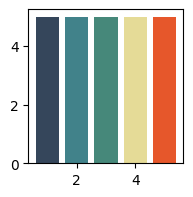

In [39]:
# mostrando as cores
mostrar_cores(response)

### POST

Enquanto no GET apenas solicitamos um recurso. O POST é usado para criar um recurso. Outras aplicações, como o Colormind que estamos usando, também usa POST para envio de informações. Vejamos um exemplo. Observe que vamos enviar 2 cores RGB, o vermelhor [255,0,0] e o verde [0,255,0] e o Colormind vai nos dar as outras duas cores.

In [40]:
url = 'http://colormind.io/api/' # site da aplicação

headers = {
    'Content-Type': 'application/x-www-form-urlencoded', # cabeçalho da requisição
}

data = '{"input":[[255, 0, 0],[0, 255, 0],"N","N","N"],"model":"default"}'  # dados da requisição

response = requests.post(url, headers=headers, data=data) # VEJA O POST!!!

[[254, 38, 20], [18, 237, 21], [50, 191, 167], [67, 174, 152], [50, 28, 42]]
['#fe2614', '#12ed15', '#32bfa7', '#43ae98', '#321c2a']


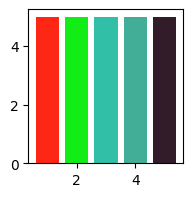

In [41]:
mostrar_cores(response)

Poderíamos mandar vermelho na primeira e azul na última seguindo a mesma lógica.

In [42]:
url = 'http://colormind.io/api/' # site da aplicação

headers = {
    'Content-Type': 'application/x-www-form-urlencoded', # cabeçalho da requisição
}

data = '{"input":[[255, 0, 0],"N","N","N",[0, 0, 255]],"model":"default"}'  # dados da requisição

response = requests.post(url, headers=headers, data=data) # VEJA O POST!!!

[[249, 19, 15], [213, 128, 39], [215, 187, 118], [30, 130, 163], [14, 19, 242]]
['#f9130f', '#d58027', '#d7bb76', '#1e82a3', '#0e13f2']


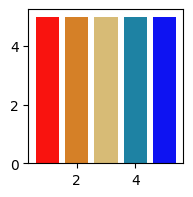

In [44]:
mostrar_cores(response)

## API POKEMON - PEGÁ-LOS EU TENTAREI

In [45]:
url = f'http://pokeapi.co/api/v1/pokemon/charizard/' # site da aplicação

headers = {
    "Content-Type": "application/json", # cabeçalho da requisição
}

data = {}  # Não enviaremos nada aqui, observe que pedimos as informações na url passando o nome do pokemon charizard

# conseguindo a resposta do serviço
response = requests.get(url, headers=headers, data=data)

# transformando a response em dicionatio
pokeinfo = response.json()

# imprimindo as chaves do dicionário
print(pokeinfo.keys())

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


Observe que podemos pegar várias informações do pokemon!

In [47]:
# Vamos ver qual a altura do charizard
pokeinfo['height']

17

In [48]:
# E como são os status do charizard
pokeinfo['stats']

[{'base_stat': 78,
  'effort': 0,
  'stat': {'name': 'hp', 'url': 'https://pokeapi.co/api/v2/stat/1/'}},
 {'base_stat': 84,
  'effort': 0,
  'stat': {'name': 'attack', 'url': 'https://pokeapi.co/api/v2/stat/2/'}},
 {'base_stat': 78,
  'effort': 0,
  'stat': {'name': 'defense', 'url': 'https://pokeapi.co/api/v2/stat/3/'}},
 {'base_stat': 109,
  'effort': 3,
  'stat': {'name': 'special-attack',
   'url': 'https://pokeapi.co/api/v2/stat/4/'}},
 {'base_stat': 85,
  'effort': 0,
  'stat': {'name': 'special-defense',
   'url': 'https://pokeapi.co/api/v2/stat/5/'}},
 {'base_stat': 100,
  'effort': 0,
  'stat': {'name': 'speed', 'url': 'https://pokeapi.co/api/v2/stat/6/'}}]

Observe que os status são retornados em formato de lista e cada elemento da lista é outro dicionário.

In [49]:
# imprimindo o nome do status e o valor do status 0
print(pokeinfo['stats'][0]['stat']['name'])
print(pokeinfo['stats'][0]['base_stat'])

hp
78


In [50]:
# imprimindo o nome do status e o valor do status 1
print(pokeinfo['stats'][1]['stat']['name'])
print(pokeinfo['stats'][1]['base_stat'])

attack
84


In [51]:
# imprimindo o nome do status e o valor do status 3
print(pokeinfo['stats'][3]['stat']['name'])
print(pokeinfo['stats'][3]['base_stat'])

special-attack
109


## Atividade para casa

Explore mais a API pokemon. 